## Revised Analytic Data Set Exploration and Modeling

### Author: Millie O. Symns
### Date Created: 3/3/22
### Date Updated: 3/15/22

This notebook takes the final `revised_analytic_dataset.csv` to continue data exploration and modeling. The approach in this notebook starts with trying to predict the price of internet using linear regression. 

Since the price data does not correlate well with the rest of the dataset, it is unsurprising that the model is not a good fit. One option suggested is to try a more robust model given some some data is missing and skewed, such as a random forest model and gradient boosted trees. [NOTE: That still needs to be done] 

###### Updates
Later we take a new approach with trying to predict broadband percentage and percent of households with desktops using linear regression since the data correlates better. The idea is that if we can predict either or both of these variables, we could potentially speak to areas in need and how certain predictors are significant signs of that need. 

For the time being we are choosing to stick with linear regression models for simplicity. The current formulas of chose are `formula3` for predicting broadband pct and `formula7` for predicting pct of households with desktops. We might change of the factors (i.e., removing pct for portable devices and see how that changes anything). We still need to visualize this model. 

Splitting the data into test and training only using the numeric variables (so exluding region):  
- Predicting broadband pct = 81%
- Predicting pct households with desktops = 83%

In [1]:
# PACKAGES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

#Reminder to add sklearn to requirements
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

#from DS4A
import statsmodels.formula.api as sm

In [2]:
# Pull in revised analytic data set
raw_revised_analytic = pd.read_csv("revised_analytic_dataset.csv")

# Explore which variables to keep 
raw_revised_analytic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 83 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    3143 non-null   object 
 1   pop_total                             3143 non-null   float64
 2   county                                3143 non-null   object 
 3   state                                 3144 non-null   object 
 4   pop_class                             3143 non-null   object 
 5   year                                  3132 non-null   float64
 6   broadband_pct                         3132 non-null   float64
 7   total_pop_enrolled                    827 non-null    float64
 8   percent_total_pop_enrolled            827 non-null    float64
 9   margin_total_pop                      827 non-null    float64
 10  est_total_households_frm_income       827 non-null    float64
 11  est_med_income_ho

## Checking correlation of variables

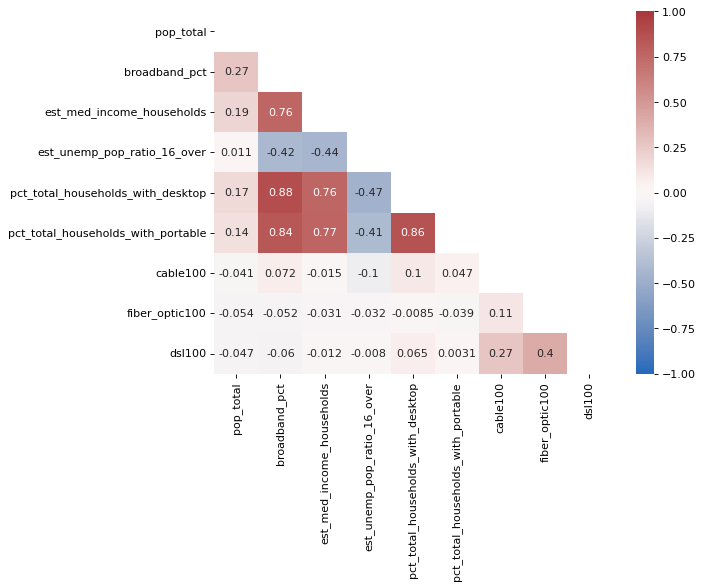

In [3]:
# Data Exploration Pt 1 (Price relationships)

part1 = raw_revised_analytic[['id', 'pop_total', 'county', 'state', 'pop_class', 'region', 'division',
                              'broadband_pct','est_med_income_households', 'est_unemp_pop_ratio_16_over',
                              'pct_total_households_with_desktop','pct_total_households_with_portable',
                             'cable100', 'fiber_optic100', 'dsl100']]

# making the figure bigger
figure(figsize=(8, 6), dpi=80)

# creating the correlation matrix
corrMatrix = part1.corr()

# using triu function to make a triangle of the matrix (only half)
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

# plotting heatmap
sns.heatmap(corrMatrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask = mask)
plt.show()

In [4]:
part1.shape

(3144, 15)

In [5]:
old_main_df = raw_revised_analytic[['id', 'pop_total', 'county', 'state', 'pop_class', 'region', 'division',
                              'broadband_pct','est_med_income_households', 'est_unemp_pop_ratio_16_over',
                              'pct_total_households_with_desktop','pct_total_households_with_portable',
                             'cable100']]


old_main_df.dropna(inplace = True)

#checking df shape
old_main_df.shape

/Users/milliesymns/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(782, 13)

## [OLD] Trying to predict price
The method of predicting price is no longer in use.

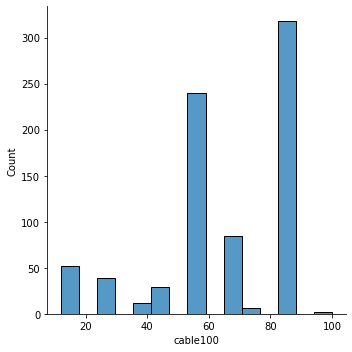

In [6]:
#One of the target vars
sns.displot(old_main_df.cable100)

### Using Sample Walkthrough to predict cable100

In [7]:
# Train test split data 

#set the target and predictors 
y = old_main_df.cable100 #target

df_temp = old_main_df.select_dtypes(include = 'float64') #only keeping numeric values
x = df_temp.drop(['cable100'], axis = 1) #predictors 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .75, random_state = 3)

In [9]:
lr = LinearRegression()
# fitting optimal linear regression line on training data 
lr.fit(x_train, y_train)

LinearRegression()

In [10]:
#for the given mosel and fit predict y values using x set 
yr_hat = lr.predict(x_test)

In [11]:
# evaluating algorithm with the test set 
lr_score = lr.score (x_test, y_test)
print("Accuracy: ", lr_score) #LOL Really inaccurate model (which was to be expected)

Accuracy:  0.029814058244541974


### Using DS4A Instruction on Linear Regression to predict cable100

In [12]:
formula1 = "cable100 ~ pop_total + broadband_pct + est_med_income_households + est_unemp_pop_ratio_16_over + pct_total_households_with_desktop + pct_total_households_with_portable"
model1 = sm.ols(formula = formula1, data = old_main_df)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:               cable100   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     9.843
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           1.78e-10
Time:                        12:33:58   Log-Likelihood:                -3467.2
No. Observations:                 782   AIC:                             6948.
Df Residuals:                     775   BIC:                             6981.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

# NEW DIRECTION: 
## Predicting Broadband Percent and Percent Households with Desktops
Below code is trying out differnt model and variable combinations

In [13]:
main_df = raw_revised_analytic[['id', 'pop_total', 'county', 'state', 'pop_class', 'region', 'division',
                              'broadband_pct','est_med_income_households', 'est_unemp_pop_ratio_16_over',
                              'pct_total_households_with_desktop','pct_total_households_with_portable']]


main_df.dropna(inplace = True)

#checking df shape
main_df.shape


/Users/milliesymns/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(812, 12)

###### Categories
- 'id', 'pop_total', 'county', 'state', 'pop_class', 'region', 'division', 

###### Numeric Data
- 'broadband_pct','est_med_income_households', 'est_unemp_pop_ratio_16_over',
- 'pct_total_households_with_desktop','pct_total_households_with_portable'

In [14]:
formula1 = "broadband_pct ~ pop_total + est_med_income_households + est_unemp_pop_ratio_16_over" 
model1 = sm.ols(formula = formula1, data = main_df)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:          broadband_pct   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     401.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.57e-159
Time:                        12:33:58   Log-Likelihood:                -2295.7
No. Observations:                 812   AIC:                             4599.
Df Residuals:                     808   BIC:                             4618.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

##### With region added and pop total removed 

In [15]:
formula2 = "broadband_pct ~ est_med_income_households + est_unemp_pop_ratio_16_over + region" 
model2 = sm.ols(formula = formula2, data = main_df)
fitted2 = model2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:          broadband_pct   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     249.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          7.56e-161
Time:                        12:33:58   Log-Likelihood:                -2286.6
No. Observations:                 812   AIC:                             4585.
Df Residuals:                     806   BIC:                             4613.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

##### Devices added to the model 
>Best model thus far regarding r-squared

In [16]:
formula3 = "broadband_pct ~ est_med_income_households + est_unemp_pop_ratio_16_over + region + pct_total_households_with_desktop + pct_total_households_with_portable" 
model3 = sm.ols(formula = formula3, data = main_df)
fitted3 = model3.fit()
print(fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:          broadband_pct   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     526.5
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.29e-295
Time:                        12:33:58   Log-Likelihood:                -1967.8
No. Observations:                 812   AIC:                             3952.
Df Residuals:                     804   BIC:                             3989.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

### Predicting PCT Households with Desktops

#### Adding pop class instead of region 

In [17]:
formula4 = "pct_total_households_with_desktop  ~ est_med_income_households + est_unemp_pop_ratio_16_over + pop_class" 
model4 = sm.ols(formula = formula4, data = main_df)
fitted4 = model4.fit()
print(fitted4.summary())

                                    OLS Regression Results                                   
Dep. Variable:     pct_total_households_with_desktop   R-squared:                       0.603
Model:                                           OLS   Adj. R-squared:                  0.602
Method:                                Least Squares   F-statistic:                     307.1
Date:                               Tue, 15 Mar 2022   Prob (F-statistic):          1.93e-160
Time:                                       12:33:58   Log-Likelihood:                -2451.6
No. Observations:                                812   AIC:                             4913.
Df Residuals:                                    807   BIC:                             4937.
Df Model:                                          4                                         
Covariance Type:                           nonrobust                                         
                                     coef    std err        

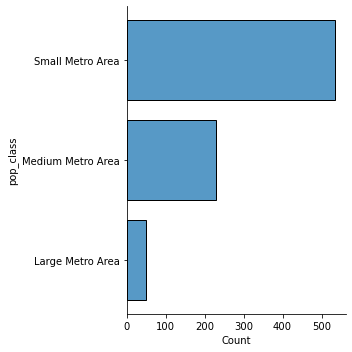

In [18]:
# Quickly checking the distribution of pop_class label in this smaller dataset
sns.displot(main_df, y="pop_class", discrete = True, shrink=.8)

#### Adding broadband pct info

In [19]:
formula5 = "pct_total_households_with_desktop  ~ est_med_income_households + est_unemp_pop_ratio_16_over + pop_class + broadband_pct" 
model5 = sm.ols(formula = formula5, data = main_df)
fitted5 = model5.fit()
print(fitted5.summary())

                                    OLS Regression Results                                   
Dep. Variable:     pct_total_households_with_desktop   R-squared:                       0.807
Model:                                           OLS   Adj. R-squared:                  0.806
Method:                                Least Squares   F-statistic:                     673.2
Date:                               Tue, 15 Mar 2022   Prob (F-statistic):          8.00e-285
Time:                                       12:33:58   Log-Likelihood:                -2159.6
No. Observations:                                812   AIC:                             4331.
Df Residuals:                                    806   BIC:                             4359.
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
                                     coef    std err        

#### Adding pct households with portable devices

In [20]:
formula6 = "pct_total_households_with_desktop  ~ est_med_income_households + est_unemp_pop_ratio_16_over + pop_class + broadband_pct + pct_total_households_with_portable" 
model6 = sm.ols(formula = formula6, data = main_df)
fitted6 = model6.fit()
print(fitted6.summary())

                                    OLS Regression Results                                   
Dep. Variable:     pct_total_households_with_desktop   R-squared:                       0.840
Model:                                           OLS   Adj. R-squared:                  0.839
Method:                                Least Squares   F-statistic:                     704.3
Date:                               Tue, 15 Mar 2022   Prob (F-statistic):          2.67e-316
Time:                                       12:33:58   Log-Likelihood:                -2083.1
No. Observations:                                812   AIC:                             4180.
Df Residuals:                                    805   BIC:                             4213.
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
                                         coef    std err    

##### Replacing pop class with region
>Region seems to be slightly better than pop class

In [21]:
formula7 = "pct_total_households_with_desktop  ~ est_med_income_households + est_unemp_pop_ratio_16_over + region + broadband_pct + pct_total_households_with_portable" 
model7 = sm.ols(formula = formula7, data = main_df)
fitted7 = model7.fit()
print(fitted7.summary())

                                    OLS Regression Results                                   
Dep. Variable:     pct_total_households_with_desktop   R-squared:                       0.845
Model:                                           OLS   Adj. R-squared:                  0.844
Method:                                Least Squares   F-statistic:                     628.5
Date:                               Tue, 15 Mar 2022   Prob (F-statistic):          5.99e-321
Time:                                       12:33:58   Log-Likelihood:                -2068.9
No. Observations:                                812   AIC:                             4154.
Df Residuals:                                    804   BIC:                             4191.
Df Model:                                          7                                         
Covariance Type:                           nonrobust                                         
                                         coef    std err    

In [22]:
# test_df1 = main_df

# test_df1['desktop_pred'] = fitted7.predict(formula7)
# test_df1['residual'] = fitted7.resid
# test_df1.head()

In [23]:
# # Plotting the observed vs predicted values
# sns.lmplot(x='pct_total_households_with_desktop', y='desktop_pred', data=test_df1, fit_reg=False, size=5)
    
# # Plotting the diagonal line
# line_coords = np.arange(test_df1[['pct_total_households_with_desktop', 'desktop_pred']].min().min()-10, 
#                         test_df1[['pct_total_households_with_desktop', 'desktop_pred']].max().max()+10)
# plt.plot(line_coords, line_coords,  # X and y points
#          color='darkorange', linestyle='--')

# plt.ylabel('Predicted Desktop', fontsize=14)
# plt.xlabel('Actual Desktop', fontsize=14)
# plt.title('Linearity Assumption', fontsize=16)
# plt.show()

## Using Test and Training Data for linear regression  
For main dataset version 2 drops values from 827 to 812 (because of unemployment field) This method only looks at the float64 variables.

In [24]:
# Train test split data

main_df2 = raw_revised_analytic[['id', 'pop_total', 'county', 'state', 'pop_class', 'region', 'division',
                              'broadband_pct','est_med_income_households', 'est_unemp_pop_ratio_16_over',
                              'pct_total_households_with_desktop','pct_total_households_with_portable']]
main_df2.dropna(inplace = True)
                                
#set the target and predictors 
y = main_df2.broadband_pct #target
df_temp = main_df2.select_dtypes(include = 'float64') #only keeping numeric values
x = df_temp.drop(['broadband_pct'], axis = 1) #predictors  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .75, random_state = 3)

lr = LinearRegression()
# fitting optimal linear regression line on training data 
lr.fit(x_train, y_train)

#for the given mosel and fit predict y values using x set 
yr_hat = lr.predict(x_test)

# evaluating algorithm with the test set 
lr_score = lr.score (x_test, y_test)
print("Accuracy for predicting broadband pct: ", lr_score) 

Accuracy for predicting broadband pct:  0.8100399971821888


/Users/milliesymns/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 1 to 3132
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   pop_total                           812 non-null    float64
 1   est_med_income_households           812 non-null    float64
 2   est_unemp_pop_ratio_16_over         812 non-null    float64
 3   pct_total_households_with_desktop   812 non-null    float64
 4   pct_total_households_with_portable  812 non-null    float64
dtypes: float64(5)
memory usage: 38.1 KB


In [26]:
# Train test split data 

#set the target and predictors 
y = main_df2.pct_total_households_with_desktop #target
df_temp = main_df2.select_dtypes(include = 'float64') #only keeping numeric values
x = df_temp.drop(['pct_total_households_with_desktop'], axis = 1) #predictors  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .75, random_state = 3)

lr = LinearRegression()
# fitting optimal linear regression line on training data 
lr.fit(x_train, y_train)

#for the given mosel and fit predict y values using x set 
yr_hat = lr.predict(x_test)

# evaluating algorithm with the test set 
lr_score = lr.score (x_test, y_test)
print("Accuracy for predicting pct households with desktops: ", lr_score) 

Accuracy for predicting pct households with desktops:  0.832890563507902
